<a href="https://colab.research.google.com/github/UdayShankar8/S9/blob/master/QuizDnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from datetime import datetime

In [2]:
print("Current Date/Time: ", datetime.now())

Current Date/Time:  2020-03-17 20:58:54.415636


In [0]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self, args):
        super(Net, self).__init__()

        self.inputblock = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=(3, 3), padding=1, bias=False),   # output_size = 30, RF = 3
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Dropout(args.dropout_value),
        ) 
    
        #InputBlock
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=(3, 3), padding=1, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Dropout(args.dropout_value),  # In: 32x32x3 | Out: 32x32x32 | RF: 3x3

            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(3, 3), padding=1, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(32), # In: 32x32x32 | Out: 32x32x32 | RF: 5x5
        )
        self.pool1 = nn.MaxPool2d(2, 2) # In: 32x32x32 | Out: 16x16x32 | RF: 6x6
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3, 3), padding=1, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Dropout(args.dropout_value),  # In: 16x16x32 | Out: 16x16x64 | RF: 10x10

            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), padding=1, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(64), # In: 16x16x64 | Out: 16x16x64 | RF: 14x14
        )
        self.pool2 = nn.MaxPool2d(2, 2) # In: 16x16x64 | Out: 8x8x64 | RF:16x16
        self.layer3 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), padding=1, groups=64, bias=False),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(1, 1), padding=0, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Dropout(args.dropout_value),  # In: 8x8x64 | Out: 8x8x64 | RF: 24x24

            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), padding=1, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(64), # In: 8x8x64 | Out: 8x8x64 | RF: 32x32
        )
        self.pool3 = nn.MaxPool2d(2, 2) # In: 8x8x64 | Out: 4x4x64 | RF: 36x36
        self.layer4 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3, 3), padding=1, dilation=2, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Dropout(args.dropout_value),  # In: 4x4x64 | Out: 4x4x128 | RF: 68x68

            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3, 3), padding=1, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(128),  # In: 4x4x128 | Out: 4x4x128 | RF: 84x84
        )
        self.gap = nn.AdaptiveAvgPool2d(output_size=1)  # In: 4x4x128 | Out: 1x1x128 | RF: 108x108
        self.layer5 = nn.Sequential(
            nn.Linear(in_features=128, out_features=10),
            # nn.ReLU() NEVER!
        )

    def forward(self, x):
        x = self.layer1(x)
        x = self.pool1(x)
        x = self.layer2(x)
        x = self.pool2(x)
        x = self.layer3(x)
        x = self.pool3(x)
        x = self.layer4(x)
        x = self.gap(x)
        x = x.view(-1, 128)
        x = self.layer5(x)
        return x


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


total 2201
-rw------- 1 root root    2488 Mar 10 17:18 testModel.py
-rw------- 1 root root    4771 Mar 10 17:18 dataTorchTransformLoad.py
-rw------- 1 root root    3807 Mar 10 17:18 trainModel.py
-rw------- 1 root root   42849 Mar 10 17:19 S8.ipynb
-rw------- 1 root root 2191380 Mar 10 17:19 EVA4_S8_CIFAR10.ipynb
-rw------- 1 root root    2700 Mar 10 18:59 customDeepCNN.py
-rw------- 1 root root    3255 Mar 17 21:55 QuIzDNN.py


Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


Files already downloaded and verified
Shape :  (50000, 32, 32, 3)
Mean :  [0.49139968 0.48215841 0.44653091]
Std :  [0.24703223 0.24348513 0.26158784]
Min :  [0. 0. 0.]
Max :  [1. 1. 1.]


[['plane' 'dog' 'deer' 'deer' 'truck' 'cat' 'truck' 'truck']
 ['cat' 'cat' 'plane' 'horse' 'plane' 'dog' 'dog' 'deer']
 ['car' 'car' 'frog' 'car' 'frog' 'dog' 'ship' 'cat']
 ['car' 'frog' 'deer' 'bird' 'deer' 'bird' 'cat' 'horse']
 ['car' 'cat' 'cat' 'ship' 'horse' 'plane' 'plane' 'plane']
 ['truck' 'plane' 'frog' 'horse' 'ship' 'deer' 'bird' 'plane']
 ['cat' 'dog' 'bird' 'truck' 'dog' 'cat' 'deer' 'dog']
 ['dog' 'frog' 'horse' 'frog' 'ship' 'deer' 'plane' 'truck']]


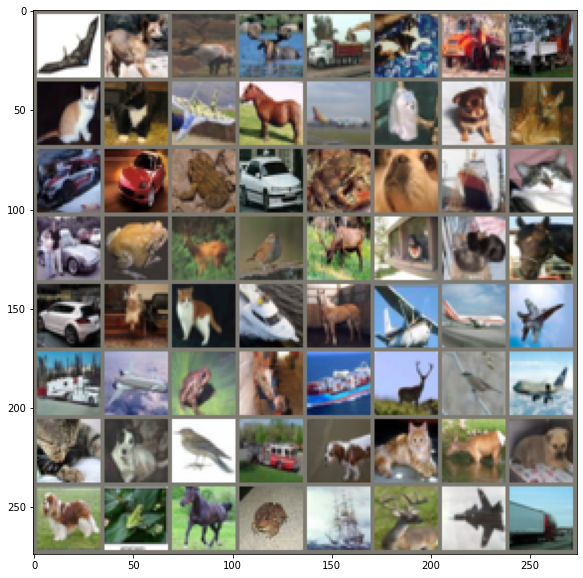

cuda


AttributeError: ignored

  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 0


/content/drive/My Drive/Colab Notebooks/S8/customDeepCNN.py:61: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)
Loss=2.742418050765991 Batch_id=0 Accuracy=10.94:   0%|          | 0/782 [00:00<?, ?it/s]/content/drive/My Drive/Colab Notebooks/S8/trainModel.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor((~pred.eq(target.view_as(pred))), dtype=torch.float, device = device).clone().detach().requires_grad_(True)
Loss=0.6474236845970154 Batch_id=781 Accuracy=53.19: 100%|██████████| 782/782 [00:34<00:00, 22.90it/s]
/content/drive/My Drive/Colab Notebooks/S8/testModel.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad


Test set: Average loss: 0.9985, Accuracy: 6424/10000 (64.24%)

EPOCH: 1


Loss=0.750647783279419 Batch_id=781 Accuracy=73.17: 100%|██████████| 782/782 [00:33<00:00, 23.45it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7613, Accuracy: 7403/10000 (74.03%)

EPOCH: 2


Loss=0.5175281167030334 Batch_id=781 Accuracy=79.89: 100%|██████████| 782/782 [00:33<00:00, 23.53it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6359, Accuracy: 7786/10000 (77.86%)

EPOCH: 3


Loss=0.2564416825771332 Batch_id=781 Accuracy=83.80: 100%|██████████| 782/782 [00:33<00:00, 23.65it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5342, Accuracy: 8220/10000 (82.20%)

EPOCH: 4


Loss=1.0339515209197998 Batch_id=781 Accuracy=86.55: 100%|██████████| 782/782 [00:33<00:00, 23.56it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5853, Accuracy: 8107/10000 (81.07%)

EPOCH: 5


Loss=0.793205201625824 Batch_id=781 Accuracy=88.43: 100%|██████████| 782/782 [00:33<00:00, 23.69it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5003, Accuracy: 8307/10000 (83.07%)

EPOCH: 6


Loss=0.21520453691482544 Batch_id=781 Accuracy=90.36: 100%|██████████| 782/782 [00:33<00:00, 23.65it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4816, Accuracy: 8450/10000 (84.50%)

EPOCH: 7


Loss=0.3724444508552551 Batch_id=781 Accuracy=95.32: 100%|██████████| 782/782 [00:32<00:00, 23.74it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3784, Accuracy: 8813/10000 (88.13%)

EPOCH: 8


Loss=0.3519365191459656 Batch_id=781 Accuracy=96.61: 100%|██████████| 782/782 [00:32<00:00, 23.80it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3757, Accuracy: 8817/10000 (88.17%)

EPOCH: 9


Loss=0.24899402260780334 Batch_id=781 Accuracy=97.26: 100%|██████████| 782/782 [00:32<00:00, 23.99it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3829, Accuracy: 8818/10000 (88.18%)

EPOCH: 10


Loss=0.13516192138195038 Batch_id=781 Accuracy=97.76: 100%|██████████| 782/782 [00:32<00:00, 23.88it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3904, Accuracy: 8822/10000 (88.22%)

EPOCH: 11


Loss=0.1147637665271759 Batch_id=781 Accuracy=98.18: 100%|██████████| 782/782 [00:32<00:00, 23.96it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3933, Accuracy: 8833/10000 (88.33%)

EPOCH: 12


Loss=0.06216132640838623 Batch_id=781 Accuracy=98.73: 100%|██████████| 782/782 [00:32<00:00, 23.88it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3936, Accuracy: 8852/10000 (88.52%)

EPOCH: 13


Loss=0.023788660764694214 Batch_id=781 Accuracy=98.86: 100%|██████████| 782/782 [00:32<00:00, 24.00it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3930, Accuracy: 8851/10000 (88.51%)

EPOCH: 14


Loss=0.05588972568511963 Batch_id=781 Accuracy=98.88: 100%|██████████| 782/782 [00:32<00:00, 24.12it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3964, Accuracy: 8834/10000 (88.34%)

EPOCH: 15


Loss=0.1252121925354004 Batch_id=781 Accuracy=98.92: 100%|██████████| 782/782 [00:32<00:00, 23.88it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3956, Accuracy: 8832/10000 (88.32%)

EPOCH: 16


Loss=0.02795886993408203 Batch_id=781 Accuracy=98.91: 100%|██████████| 782/782 [00:32<00:00, 23.98it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3951, Accuracy: 8848/10000 (88.48%)

EPOCH: 17


Loss=0.026591479778289795 Batch_id=781 Accuracy=98.87: 100%|██████████| 782/782 [00:32<00:00, 23.86it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3964, Accuracy: 8848/10000 (88.48%)

EPOCH: 18


Loss=0.006815880537033081 Batch_id=781 Accuracy=98.95: 100%|██████████| 782/782 [00:32<00:00, 24.11it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3981, Accuracy: 8846/10000 (88.46%)

EPOCH: 19


Loss=0.01324164867401123 Batch_id=781 Accuracy=98.95: 100%|██████████| 782/782 [00:32<00:00, 23.88it/s]



Test set: Average loss: 0.3961, Accuracy: 8849/10000 (88.49%)



Text(0.5, 1.0, 'Test Accuracy')

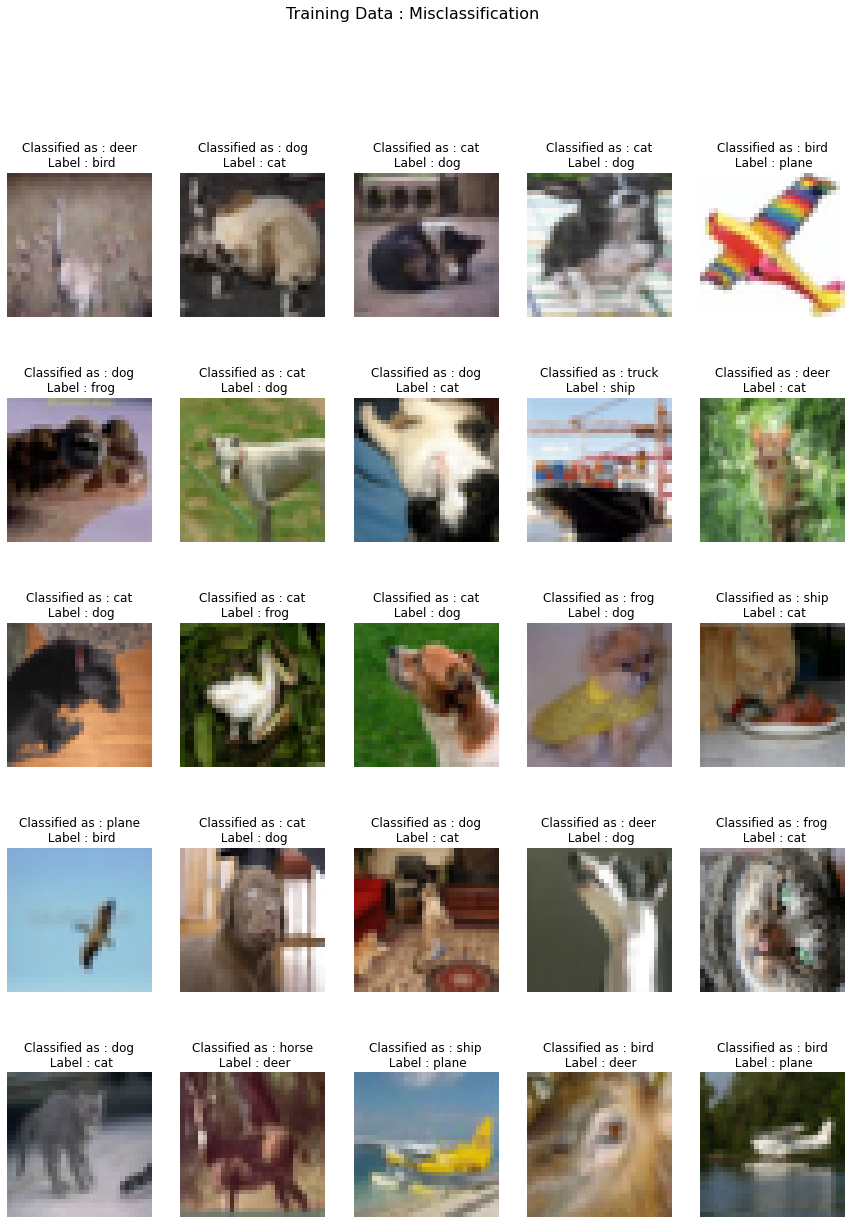

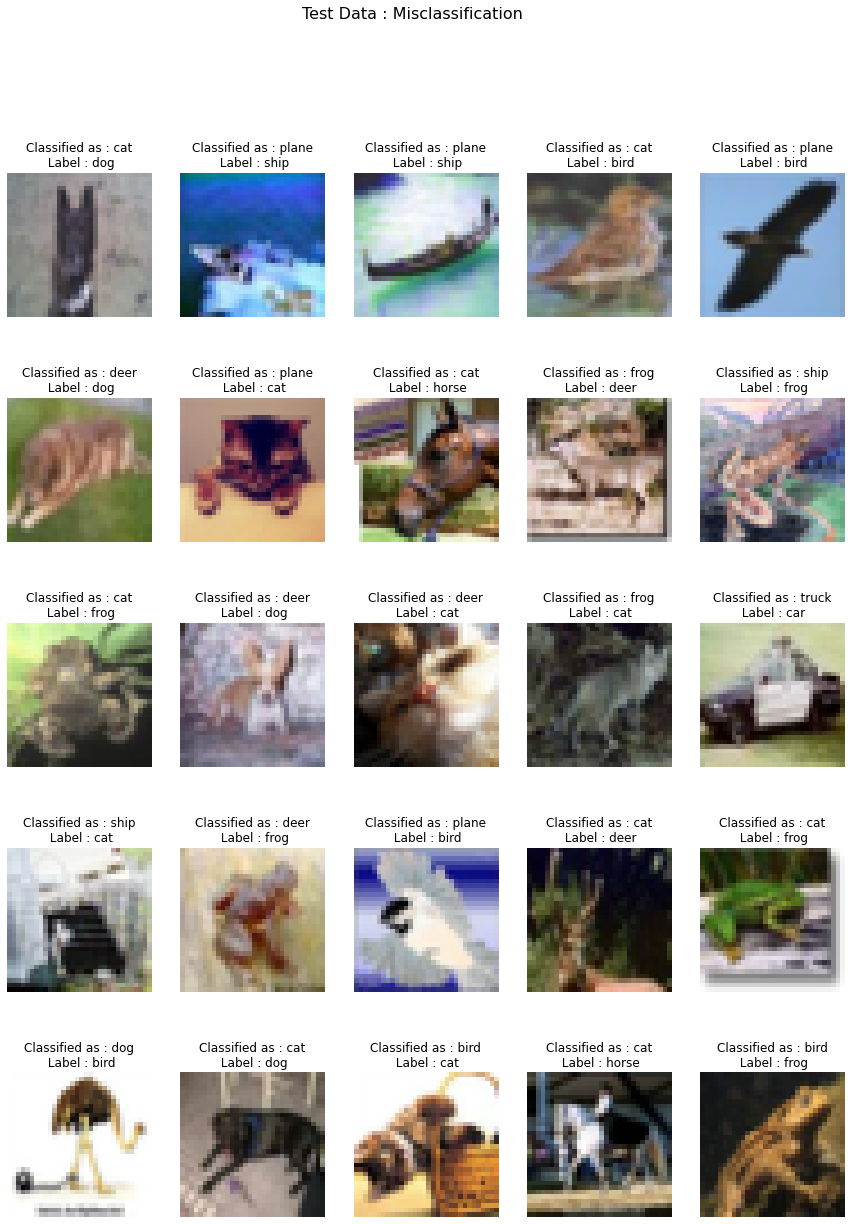

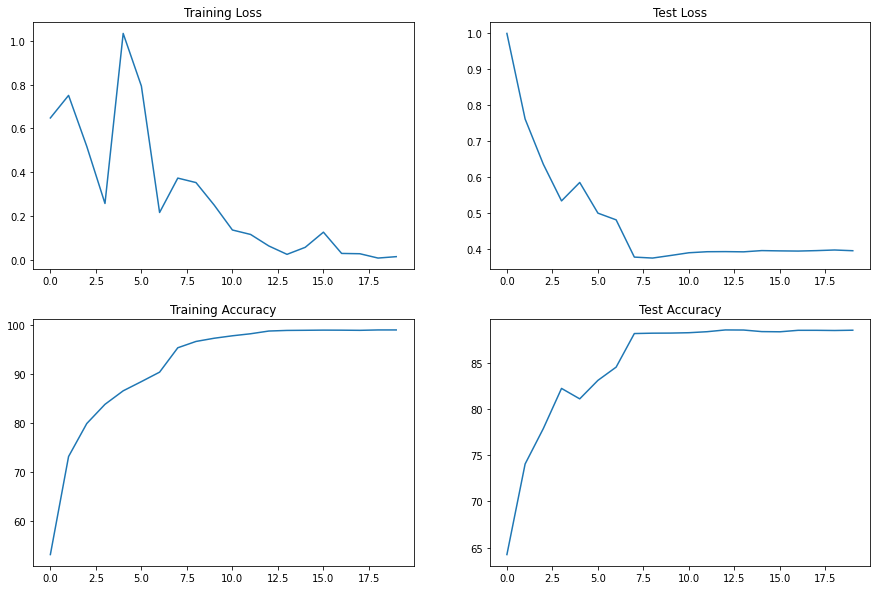